### gather and format data

In [163]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py

df = pd.read_csv('sensors_walking.csv')
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow = pd.read_csv('flow_walking.csv')
flow.columns = ['Flow']

df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds
0,0.731309,0.751686,0.728809,0.781483,0.105801,0.186839,0.294937,0.345199,10.0,50.0,1.139983
1,0.732341,0.753891,0.731525,0.785005,0.105907,0.188878,0.294519,0.346261,10.0,50.0,1.149434
2,0.733343,0.756291,0.734773,0.788314,0.105901,0.191718,0.297066,0.346372,10.0,50.0,1.158912
3,0.734314,0.758610,0.737137,0.791787,0.105788,0.194066,0.294488,0.347056,10.0,50.0,1.168432
4,0.735255,0.760844,0.740384,0.795052,0.105610,0.196003,0.297086,0.347001,10.0,50.0,1.177880


In [164]:
flow.head()

,Flow
0,3.012306
1,-12.605604
2,-8.539249
3,-10.130252
4,-7.973363


In [165]:
def movingAvg(Class, windowSize):
    """
    Create moving average to remove single outliers

    Args:
        Class (list): List of inhale / exhale classes
        Windowsize (int): Size of moving average window

    Returns:
        filteredClass (list): Filtered list of classes
    """
    
    filteredClass = []
    for i in range(0, len(Class)):

        if i < windowSize - 1:
            filteredClass.append(Class[i])

        elif Class[i] != Class[i - 1]:
            if sum(Class[i - (windowSize - 1):(i + 1)]) / windowSize > 1:
                filteredClass.append(2)

            elif sum(Class[i - (windowSize - 1):(i + 1)]) / windowSize < 1:
                filteredClass.append(0)

            else:
                filteredClass.append(Class[i])

        elif Class[i] == Class[i - 1]:
            filteredClass.append(Class[i])
            
    return filteredClass

def classSwitch(Class):
    """
    Class switch function to filter 3 classifiers down to 2 (inhale and exhale)

    Args:
        Class (list): List of inhale / exhale classes

    Returns:
        decisionClass (list): Filtered (with moving average) of resulting simplified class
    """

    decision = []
    for i in range(0, len(Class)):
        
        if Class[i] == 1:
            decision.append(1)
            
        elif Class[i] == 0:
            decision.append(0)
            
        elif Class[i] == 2:
            if len(decision) > 1:
                decision.append(decision[-1])
            else:
                decision.append(2)
            
    return movingAvg(decision, 3)

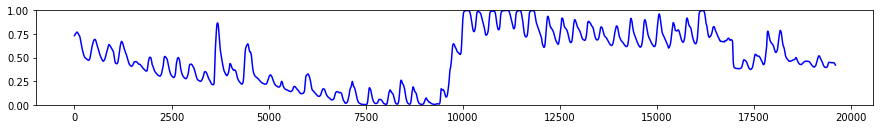

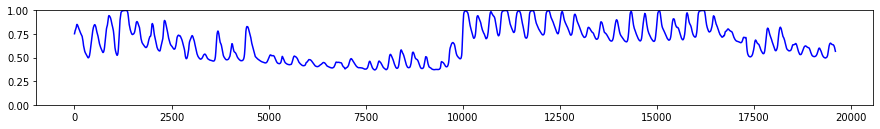

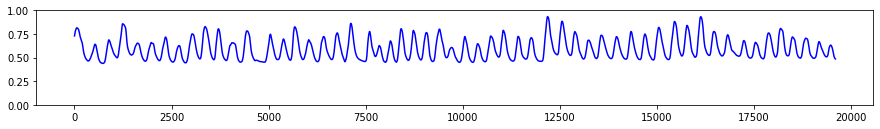

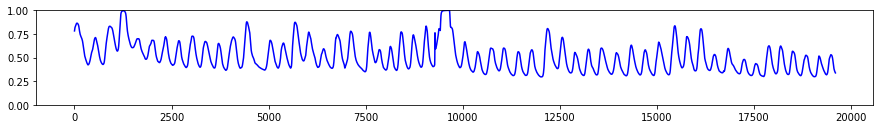

In [205]:
x = range(0, len(df))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.ylim(0, 1)
plt.plot(x, df['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.ylim(0, 1)
plt.plot(x, df['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.ylim(0, 1)
plt.plot(x, df['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.ylim(0, 1)
plt.plot(x, df['4'], 'b')
plt.show()

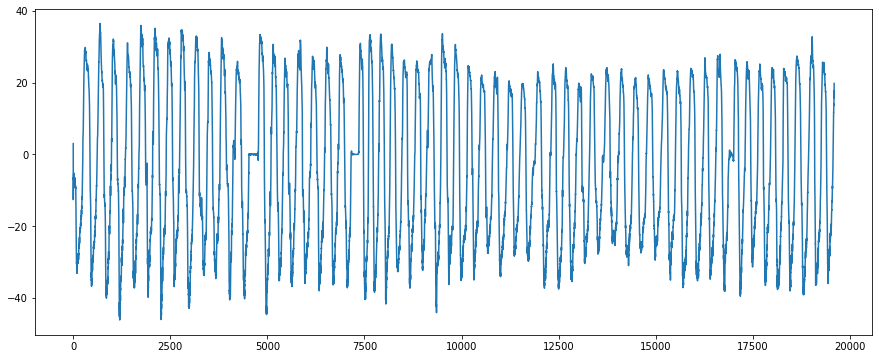

In [167]:
fig = plt.figure(figsize = (15, 6))
plt.plot(flow['Flow'])

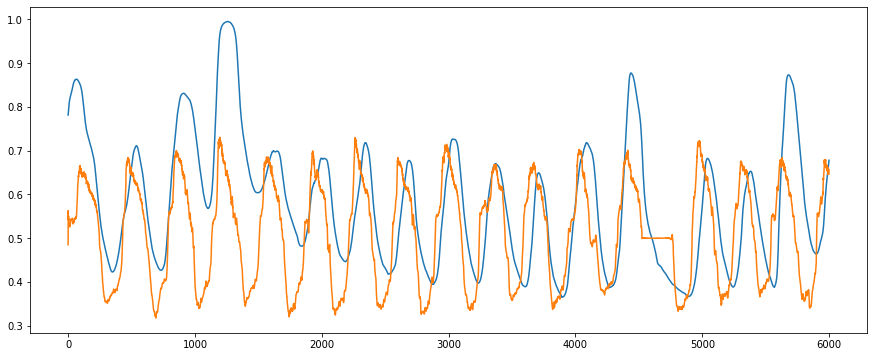

In [168]:
x = range(0, len(df['4'][0:6000]))
flow['a'] = (flow['Flow'] / 200) - 0.5
fig = plt.figure(figsize = (15, 6))
plt.plot(x, df['4'][0:6000], x, flow['a'][0:6000]*-1)

In [169]:
flow.drop('a', inplace = True, axis = 1)

In [170]:
def label_fix(label):
    if label < -18:
        return 0
    elif label > 18:
        return 1
    else:
        return 2

df['Class'] = flow['Flow'].apply(label_fix)

In [171]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.731309,0.751686,0.728809,0.781483,0.105801,0.186839,0.294937,0.345199,10.0,50.0,1.139983,2
1,0.732341,0.753891,0.731525,0.785005,0.105907,0.188878,0.294519,0.346261,10.0,50.0,1.149434,2
2,0.733343,0.756291,0.734773,0.788314,0.105901,0.191718,0.297066,0.346372,10.0,50.0,1.158912,2
3,0.734314,0.758610,0.737137,0.791787,0.105788,0.194066,0.294488,0.347056,10.0,50.0,1.168432,2
4,0.735255,0.760844,0.740384,0.795052,0.105610,0.196003,0.297086,0.347001,10.0,50.0,1.177880,2


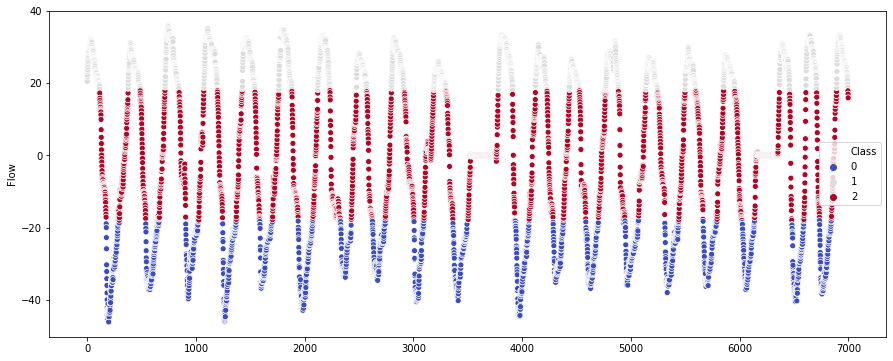

In [172]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow['Flow'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

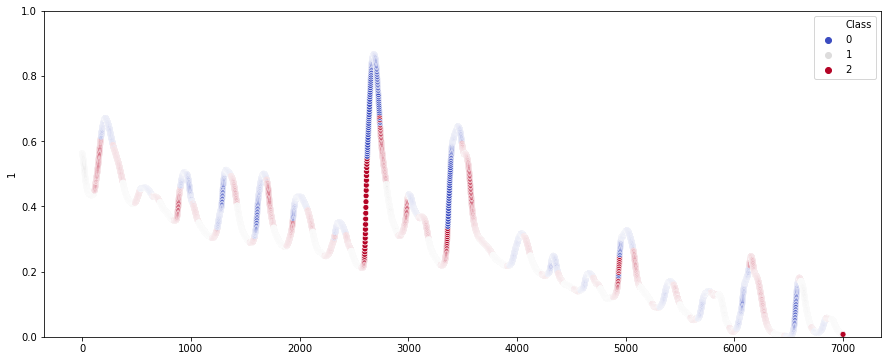

In [206]:
fig = plt.figure(figsize = (15, 6))
plt.ylim(0, 1)
sns.scatterplot(y = df['1'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

In [174]:
df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds,Class
0,0.731309,0.751686,0.728809,0.781483,0.105801,0.186839,0.294937,0.345199,10.0,50.0,1.139983,2
1,0.732341,0.753891,0.731525,0.785005,0.105907,0.188878,0.294519,0.346261,10.0,50.0,1.149434,2
2,0.733343,0.756291,0.734773,0.788314,0.105901,0.191718,0.297066,0.346372,10.0,50.0,1.158912,2
3,0.734314,0.758610,0.737137,0.791787,0.105788,0.194066,0.294488,0.347056,10.0,50.0,1.168432,2
4,0.735255,0.760844,0.740384,0.795052,0.105610,0.196003,0.297086,0.347001,10.0,50.0,1.177880,2


In [175]:
# Create the data matrix
X = df.drop('Class', axis = 1)
X.drop('hours', inplace = True, axis = 1)
X.drop('minutes', inplace = True, axis = 1)
X.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
y = df['Class']
y = pd.DataFrame(y, index = None, columns = ['Class'])

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

In [176]:
len(X)

19595

### model training - deep learning

In [177]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
#model.add(keras.layers.Dense(125, activation = tf.nn.relu))
#model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 150)               1350      
_________________________________________________________________
dropout_9 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               15100     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 3)                

In [178]:
EPOCHS = 2000
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/2000
13716/13716 [==============================] - 0s 35us/sample - loss: 0.7549 - acc: 0.6241
Epoch 2/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.6062 - acc: 0.7106
Epoch 3/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.5727 - acc: 0.7419
Epoch 4/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.5502 - acc: 0.7537
Epoch 5/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.5347 - acc: 0.7601
Epoch 6/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.5212 - acc: 0.7727
Epoch 7/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.5062 - acc: 0.7800
Epoch 8/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.4959 - acc: 0.7837
Epoch 9/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.4811 - acc: 0.7920
Epoch 10/2000
13716/13716 [==============================] - 0s 

13716/13716 [==============================] - 0s 26us/sample - loss: 0.2464 - acc: 0.8965
Epoch 156/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2331 - acc: 0.8990
Epoch 157/2000
13716/13716 [==============================] - 0s 25us/sample - loss: 0.2431 - acc: 0.8994
Epoch 158/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2349 - acc: 0.9030
Epoch 159/2000
13716/13716 [==============================] - 0s 25us/sample - loss: 0.2417 - acc: 0.9005
Epoch 160/2000
13716/13716 [==============================] - 0s 25us/sample - loss: 0.2437 - acc: 0.8998
Epoch 161/2000
13716/13716 [==============================] - 0s 25us/sample - loss: 0.2419 - acc: 0.9000
Epoch 162/2000
13716/13716 [==============================] - 0s 25us/sample - loss: 0.2327 - acc: 0.9039
Epoch 163/2000
13716/13716 [==============================] - 0s 25us/sample - loss: 0.2356 - acc: 0.9022
Epoch 164/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 26us/sample - loss: 0.2046 - acc: 0.9175
Epoch 310/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2072 - acc: 0.9180
Epoch 311/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2050 - acc: 0.9174
Epoch 312/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1999 - acc: 0.9172
Epoch 313/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2007 - acc: 0.9195
Epoch 314/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.2150 - acc: 0.9137
Epoch 315/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1972 - acc: 0.9187
Epoch 316/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2047 - acc: 0.9171
Epoch 317/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.2056 - acc: 0.9195
Epoch 318/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 26us/sample - loss: 0.1839 - acc: 0.9261
Epoch 464/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1841 - acc: 0.9269
Epoch 465/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1876 - acc: 0.9277
Epoch 466/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1908 - acc: 0.9240
Epoch 467/2000
13716/13716 [==============================] - 0s 25us/sample - loss: 0.1876 - acc: 0.9252
Epoch 468/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1833 - acc: 0.9267
Epoch 469/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1876 - acc: 0.9258
Epoch 470/2000
13716/13716 [==============================] - 0s 25us/sample - loss: 0.1823 - acc: 0.9255
Epoch 471/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1869 - acc: 0.9258
Epoch 472/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 26us/sample - loss: 0.1688 - acc: 0.9318
Epoch 618/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1661 - acc: 0.9310
Epoch 619/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1862 - acc: 0.9291
Epoch 620/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1784 - acc: 0.9297
Epoch 621/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1796 - acc: 0.9305
Epoch 622/2000
13716/13716 [==============================] - 0s 25us/sample - loss: 0.1782 - acc: 0.9281
Epoch 623/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1807 - acc: 0.9269
Epoch 624/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1793 - acc: 0.9295
Epoch 625/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1739 - acc: 0.9307
Epoch 626/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 27us/sample - loss: 0.1704 - acc: 0.9318
Epoch 772/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1619 - acc: 0.9373
Epoch 773/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1691 - acc: 0.9353
Epoch 774/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1717 - acc: 0.9315
Epoch 775/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1699 - acc: 0.9352
Epoch 776/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1677 - acc: 0.9330
Epoch 777/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1647 - acc: 0.9364
Epoch 778/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1703 - acc: 0.9334
Epoch 779/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1674 - acc: 0.9326
Epoch 780/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 26us/sample - loss: 0.1623 - acc: 0.9362
Epoch 926/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1697 - acc: 0.9336
Epoch 927/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1584 - acc: 0.9390
Epoch 928/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1605 - acc: 0.9350
Epoch 929/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1612 - acc: 0.9377
Epoch 930/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1599 - acc: 0.9388
Epoch 931/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1645 - acc: 0.9356
Epoch 932/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1636 - acc: 0.9371
Epoch 933/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1630 - acc: 0.9377
Epoch 934/2000
13716/13716 [==============================] -

13716/13716 [==============================] - 0s 27us/sample - loss: 0.1556 - acc: 0.9417
Epoch 1079/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1625 - acc: 0.9361
Epoch 1080/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1558 - acc: 0.9407
Epoch 1081/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1541 - acc: 0.9410
Epoch 1082/2000
13716/13716 [==============================] - 0s 31us/sample - loss: 0.1583 - acc: 0.9396
Epoch 1083/2000
13716/13716 [==============================] - 0s 30us/sample - loss: 0.1594 - acc: 0.9355
Epoch 1084/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1604 - acc: 0.9376
Epoch 1085/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1531 - acc: 0.9406
Epoch 1086/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1679 - acc: 0.9361
Epoch 1087/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 31us/sample - loss: 0.1562 - acc: 0.9391
Epoch 1231/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1516 - acc: 0.9420
Epoch 1232/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1537 - acc: 0.9423
Epoch 1233/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1551 - acc: 0.9386
Epoch 1234/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1497 - acc: 0.9414
Epoch 1235/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1554 - acc: 0.9401
Epoch 1236/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1548 - acc: 0.9458
Epoch 1237/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1579 - acc: 0.9384
Epoch 1238/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1473 - acc: 0.9444
Epoch 1239/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 27us/sample - loss: 0.1548 - acc: 0.9429
Epoch 1383/2000
13716/13716 [==============================] - 0s 30us/sample - loss: 0.1522 - acc: 0.9415
Epoch 1384/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1489 - acc: 0.9415
Epoch 1385/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1511 - acc: 0.9417
Epoch 1386/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1542 - acc: 0.9400
Epoch 1387/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1487 - acc: 0.9434
Epoch 1388/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1535 - acc: 0.9405
Epoch 1389/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1499 - acc: 0.9423
Epoch 1390/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1528 - acc: 0.9403
Epoch 1391/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 29us/sample - loss: 0.1468 - acc: 0.9424
Epoch 1535/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1460 - acc: 0.9455
Epoch 1536/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1409 - acc: 0.9449
Epoch 1537/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1408 - acc: 0.9459
Epoch 1538/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1377 - acc: 0.9469
Epoch 1539/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1539 - acc: 0.9443
Epoch 1540/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1510 - acc: 0.9421
Epoch 1541/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1511 - acc: 0.9414
Epoch 1542/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1500 - acc: 0.9438
Epoch 1543/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 29us/sample - loss: 0.1470 - acc: 0.9460
Epoch 1687/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1429 - acc: 0.9466
Epoch 1688/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1440 - acc: 0.9457
Epoch 1689/2000
13716/13716 [==============================] - 0s 30us/sample - loss: 0.1450 - acc: 0.9452
Epoch 1690/2000
13716/13716 [==============================] - 0s 30us/sample - loss: 0.1493 - acc: 0.9447
Epoch 1691/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1462 - acc: 0.9433
Epoch 1692/2000
13716/13716 [==============================] - 0s 29us/sample - loss: 0.1458 - acc: 0.9439
Epoch 1693/2000
13716/13716 [==============================] - 0s 31us/sample - loss: 0.1455 - acc: 0.9455
Epoch 1694/2000
13716/13716 [==============================] - 0s 31us/sample - loss: 0.1452 - acc: 0.9444
Epoch 1695/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 27us/sample - loss: 0.1416 - acc: 0.9457
Epoch 1839/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1510 - acc: 0.9430
Epoch 1840/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1461 - acc: 0.9441
Epoch 1841/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1494 - acc: 0.9420
Epoch 1842/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1454 - acc: 0.9442
Epoch 1843/2000
13716/13716 [==============================] - 0s 26us/sample - loss: 0.1456 - acc: 0.9433
Epoch 1844/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1465 - acc: 0.9452
Epoch 1845/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1395 - acc: 0.9474
Epoch 1846/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1435 - acc: 0.9452
Epoch 1847/2000
13716/13716 [========================

13716/13716 [==============================] - 0s 28us/sample - loss: 0.1384 - acc: 0.9464
Epoch 1991/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1380 - acc: 0.9479
Epoch 1992/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1392 - acc: 0.9492
Epoch 1993/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1427 - acc: 0.9452
Epoch 1994/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1391 - acc: 0.9485
Epoch 1995/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1381 - acc: 0.9498
Epoch 1996/2000
13716/13716 [==============================] - 0s 27us/sample - loss: 0.1389 - acc: 0.9472
Epoch 1997/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1408 - acc: 0.9473
Epoch 1998/2000
13716/13716 [==============================] - 0s 28us/sample - loss: 0.1359 - acc: 0.9493
Epoch 1999/2000
13716/13716 [========================

In [179]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

prediction = model.predict(X_test)

final_pred = []
for score in range(0, len(prediction)):
    final_pred.append(np.argmax(prediction[score]))
    
print(classification_report(y_test, final_pred))
print(confusion_matrix(y_test, final_pred))
Predictions = classSwitch(final_pred)
Class = classSwitch(list(y_test['Class']))
print('Keras Model')
print("\n")
print(classification_report(Class, Predictions))

5879/5879 [==============================] - 0s 20us/sample - loss: 0.1058 - acc: 0.9616
Test accuracy: 0.9615581
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2035
           1       0.94      0.98      0.96      1602
           2       0.96      0.93      0.95      2242

    accuracy                           0.96      5879
   macro avg       0.96      0.96      0.96      5879
weighted avg       0.96      0.96      0.96      5879

[[1989    0   46]
 [   0 1571   31]
 [  55   94 2093]]
Keras Model


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4107
           1       0.94      0.96      0.95      1771
           2       1.00      1.00      1.00         1

    accuracy                           0.97      5879
   macro avg       0.98      0.98      0.98      5879
weighted avg       0.97      0.97      0.97      5879



In [180]:
#export_csv = pd.DataFrame(X_test).to_csv(r'/Users/mikefurr/Documents/GitHub/coral_host/Jupyter_Notebooks/X_test.csv', header = True, index = None)

In [181]:
#coral_results = pd.read_csv('coral_results.csv')

In [182]:
#print(classification_report(y_test, coral_results))

### model training - tensorflow random forest

### model training - random forest

In [183]:
import timeit

In [209]:
print(" Random Forest ... ")

start = timeit.default_timer()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5000)
rf_model = classifier.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
end = timeit.default_timer()

print(" accuracy = ", accuracy_score(y_test, predictions), " time = ", end - start)
print(confusion_matrix(y_test, predictions))
print("\n")

print("Random Forest")
print(classification_report(y_test, predictions))

 Random Forest ... 


/Users/mikefurr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


 accuracy =  0.9783976866814084  time =  163.06941773899962
[[1993    0   42]
 [   0 1576   26]
 [  34   25 2183]]


Random Forest
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2035
           1       0.98      0.98      0.98      1602
           2       0.97      0.97      0.97      2242

    accuracy                           0.98      5879
   macro avg       0.98      0.98      0.98      5879
weighted avg       0.98      0.98      0.98      5879



In [210]:
Predictions = classSwitch(predictions)
Class = classSwitch(list(y_test['Class']))
print('Random Forest')
print("\n")
print(classification_report(Class, Predictions))

Random Forest


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4107
           1       0.97      0.97      0.97      1771
           2       1.00      1.00      1.00         1

    accuracy                           0.98      5879
   macro avg       0.98      0.98      0.98      5879
weighted avg       0.98      0.98      0.98      5879



### model testing on new data

In [186]:
df_test = pd.read_csv('sensors_2.csv')
df_test.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow_test = pd.read_csv('Flow_2.csv')
flow_test.columns = ['Flow']

In [187]:
df_test['Class'] = flow_test['Flow'].apply(label_fix)

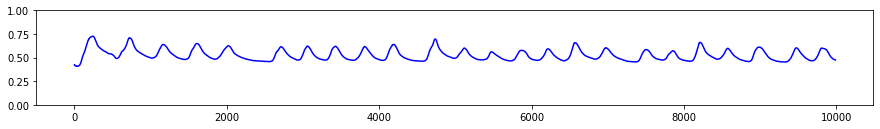

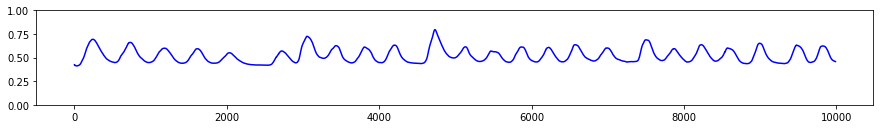

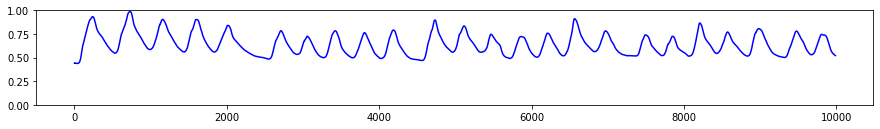

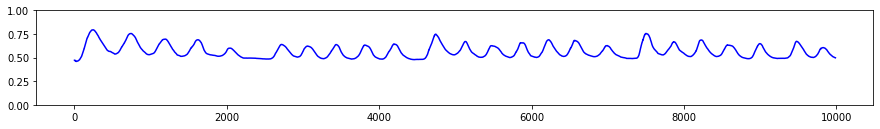

In [204]:
x = range(0, len(df_test))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.ylim(0, 1)
plt.plot(x, df_test['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.ylim(0, 1)
plt.plot(x, df_test['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.ylim(0, 1)
plt.plot(x, df_test['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.ylim(0, 1)
plt.plot(x, df_test['4'], 'b')
plt.show()

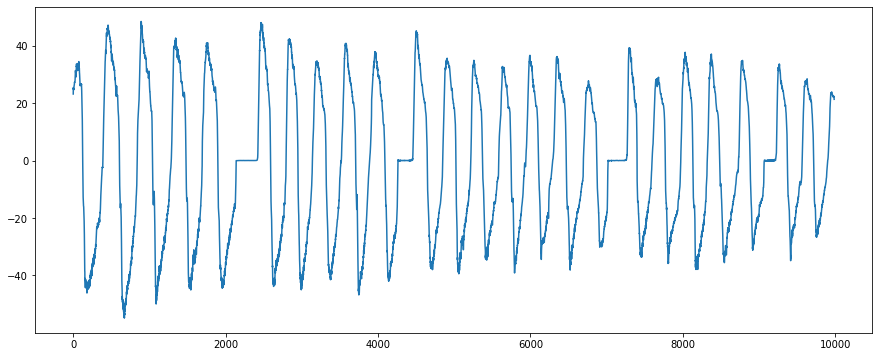

In [189]:
fig = plt.figure(figsize = (15, 6))
plt.plot(flow_test['Flow'])

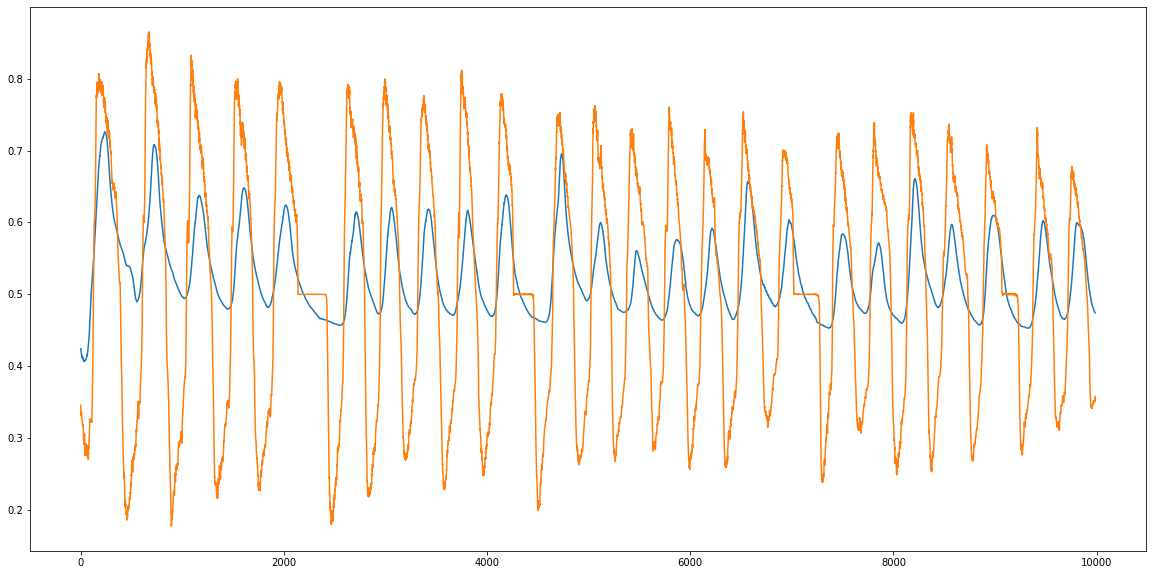

In [190]:
flow_test['a'] = (flow_test['Flow'] / 150) - 0.5
fig = plt.figure(figsize = (20, 10))
plt.plot(x, df_test['1'], x, flow_test['a']*-1)

In [191]:
flow_test.drop('a', inplace = True, axis = 1)

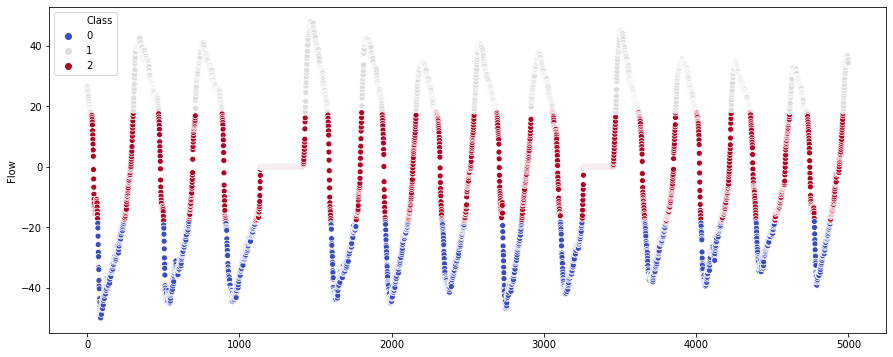

In [192]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:6000], x = range(0, 5000), hue = df_test['Class'][1000:6000], palette = 'coolwarm')

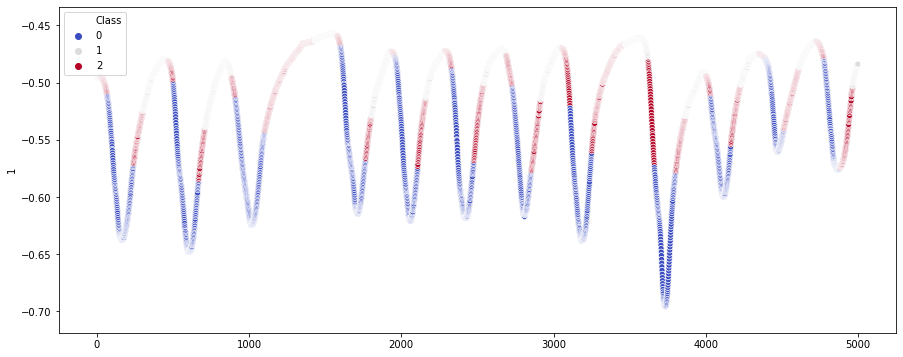

In [208]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = df_test['1'][1000:6000]*-1, x = range(0, 5000), hue = df_test['Class'][1000:6000], palette = 'coolwarm')

In [194]:
test_sensors = df_test.drop('Class', axis = 1)
test_sensors.drop('hours', inplace = True, axis = 1)
test_sensors.drop('minutes', inplace = True, axis = 1)
test_sensors.drop('seconds', inplace = True, axis = 1)

# Create the classification matrix
test_class = df_test['Class']
test_class = pd.DataFrame(test_class, index = None, columns = ['Class'])

#### model testing - random forest

In [211]:
test_predictions = rf_model.predict(test_sensors)
print(" accuracy = ", accuracy_score(test_class, test_predictions))
print(confusion_matrix(test_class, test_predictions))
print("\n")

print('Random Forest - Testing')
print('\n')
print(classification_report(test_class, test_predictions))

 accuracy =  0.6681349484432876
[[2787    0  488]
 [  74 1787 1375]
 [ 686  692 2100]]


Random Forest - Testing


              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3275
           1       0.72      0.55      0.63      3236
           2       0.53      0.60      0.56      3478

    accuracy                           0.67      9989
   macro avg       0.68      0.67      0.67      9989
weighted avg       0.68      0.67      0.67      9989



In [212]:
testPredictions = classSwitch(test_predictions)
testClass = classSwitch(list(test_class['Class']))
print('Random Forest - Testing')
print('\n')
print(classification_report(testClass, testPredictions))

Random Forest - Testing


              precision    recall  f1-score   support

           0       0.78      0.88      0.83      5801
           1       0.80      0.66      0.72      4188
           2       0.00      0.00      0.00         0

    accuracy                           0.79      9989
   macro avg       0.53      0.51      0.52      9989
weighted avg       0.79      0.79      0.78      9989



/Users/mikefurr/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### model testing - deep learning

In [213]:
test_predictions = model.predict(test_sensors)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))

print('Keras Model - Testing')
print('\n')
print(classification_report(test_class, final_pred_test))

Keras Model - Testing


              precision    recall  f1-score   support

           0       0.68      0.78      0.72      3275
           1       0.71      0.80      0.75      3236
           2       0.54      0.40      0.46      3478

    accuracy                           0.65      9989
   macro avg       0.64      0.66      0.64      9989
weighted avg       0.64      0.65      0.64      9989



In [214]:
testPredictions = classSwitch(final_pred_test)
testClass = classSwitch(list(test_class['Class']))
print('Keras Model - Testing')
print('\n')
print(classification_report(testClass, testPredictions))

Keras Model - Testing


              precision    recall  f1-score   support

           0       0.89      0.79      0.83      5801
           1       0.74      0.86      0.80      4188
           2       0.00      0.00      0.00         0

    accuracy                           0.82      9989
   macro avg       0.54      0.55      0.54      9989
weighted avg       0.83      0.82      0.82      9989



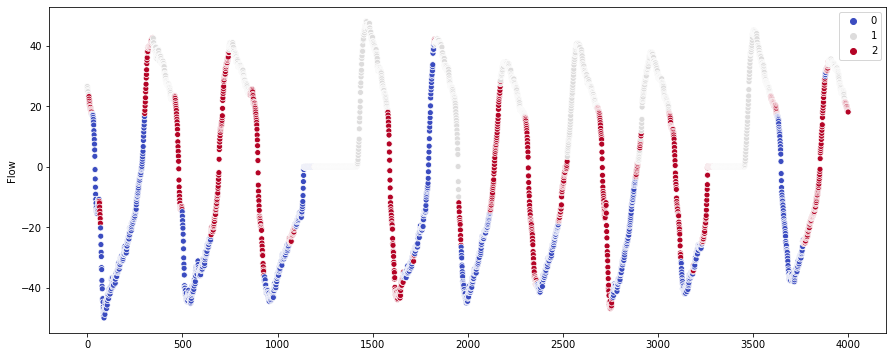

In [199]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow_test['Flow'][1000:5000], x = range(0, 4000), hue = final_pred_test[1000:5000], palette = 'coolwarm')

In [200]:
# Looking at where either model fails
#test_class['score'] = test_class['Class'] == final_pred_test
#fig = plt.figure(figsize = (15, 6))
#sns.scatterplot(y = flow_test['Flow'][1000:], x = range(0, ), hue = test_class['score'][1000:])

#### Save TFLite Model

In [201]:
#keras_file = "walking_model.h5"
#keras.models.save_model(model, keras_file)
#converter = tf.lite.TocoConverter.from_keras_model_file('walking_model.h5')
#tflite_model = converter.convert()
#open("walking_model.tflite", "wb").write(tflite_model)